In [8]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [9]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/hla_types.alternate.csv', index_col=0)

In [10]:
df.head()

,DPA1_allele1,DPA1_allele2,DPB1_allele1,DPB1_allele2,DQA1_allele1,DQA1_allele2,DQB1_allele1,DQB1_allele2,DRB1_allele1,DRB1_allele2
SRR1034682,DPA10103,DPA10103,DPB10401,DPB12301\n,DQA10102,DQA10505,DQB10602,DQB10301,DRB1_1305,DRB1_1501
SRR1034704,DPA10103,DPA10103,DPB10301,DPB110401\n,DQA10201,DQA10501,DQB10202,DQB10201,DRB1_0301,DRB1_0701
SRR1034717,DPA10103,DPA10103,DPB10301,DPB110401\n,DQA10201,DQA10501,DQB10202,DQB10201,DRB1_0301,DRB1_0701
SRR1034730,DPA10103,DPA10104\n,DPB10401,DPB11501\n,DQA10201,DQA10303,DQB10202,DQB10301,DRB1_0401,DRB1_0401
SRR1034743,DPA10103,DPA10202,DPB10401,DPB10101,DQA10104,DQA10201\n,DQB10503,DQB10503,DRB1_1454,DRB1_0701


In [20]:
combined_df = pd.DataFrame({'DPA': [x.strip() for x in list(df.DPA1_allele1) + list(df.DPA1_allele2)],
                            'DPB': [x.strip() for x in list(df.DPB1_allele1) + list(df.DPB1_allele2)],
                            'DQA': [str(x).strip() for x in list(df.DQA1_allele2) + list(df.DQA1_allele2)],
                            'DQB': [str(x).strip() for x in list(df.DQB1_allele2) + list(df.DQB1_allele2)],
                            'DRB': [str(x).strip() for x in list(df.DRB1_allele2) + list(df.DRB1_allele2)]})

In [23]:
combined_df = combined_df.replace('-', np.nan).dropna()
print len(combined_df)

1466


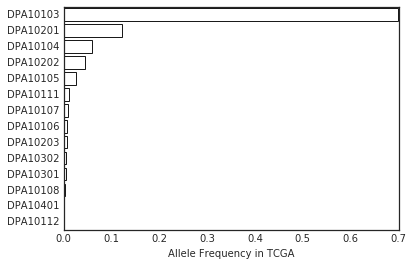

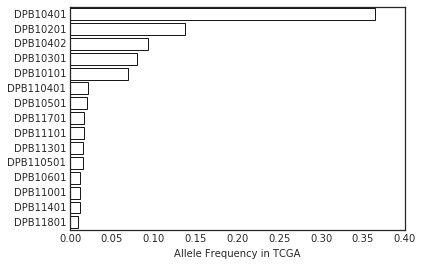

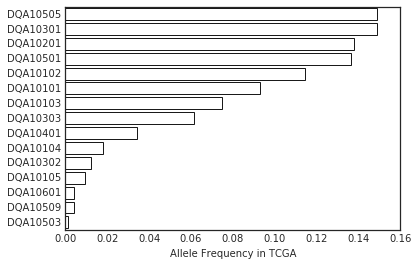

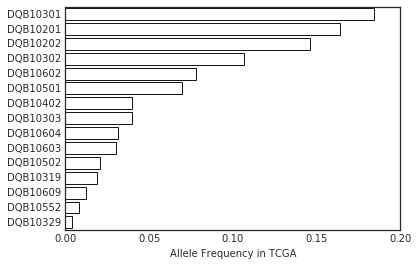

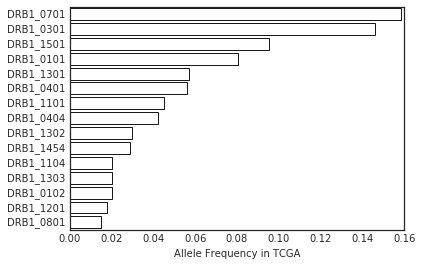

In [24]:
for gene in ['DPA', 'DPB', 'DQA', 'DQB', 'DRB']:
    df_A = pd.DataFrame(combined_df[gene].value_counts()/len(combined_df)).reset_index()[:15]
    df_A.columns = ['allele', 'frequency']
    sns.set_color_codes("muted")
    sns.barplot(x="frequency", y="allele", data=df_A,
                label="Total", color="white")
    plt.xlabel('Allele Frequency in TCGA')
    plt.ylabel('')
    plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/hla_typing/alternate.{0}.pdf'.format(gene))
    plt.show()
    plt.clf()